In [100]:
import pandas as pd
import numpy as np
import re
import tweepy
import datetime
from pandas_datareader import data as web
from textblob import TextBlob
from sklearn.svm import SVR
from treeinterpreter import treeinterpreter as ti
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
consumer_key = "W8olFrRLK7Lt7BUh6YAbdSG4h"
consumer_secret = "izRdiwC73rntSdMdAQm2gL8zFNAHVLa99A8dI99w0Lz16jvNrx"

access_token = "620364433-Kj5up6bB6KLfl5wfmxxcAnWthse5o38P2MKABM00"
access_token_secret = "Faxxv0hb54KF7MmakQ8WZmvaCC5YIprcWhiOuEyQY2iLt"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

fetch_tweets=tweepy.Cursor(api.search, q="#TSLA",count=100, lang ="en",since="2019-9-25", tweet_mode="extended").items()
data=pd.DataFrame(data=[[tweet_info.created_at.date(),tweet_info.full_text]for tweet_info in fetch_tweets],columns=['Date','Tweets'])

data.to_csv("TeslaTweets.csv")
cdata=pd.DataFrame(columns=['Date','Tweets'])
print("Created CSV")

Created CSV


In [159]:
data = pd.read_csv('tweets_data_old_elonmusk.csv')

In [160]:
cdata=pd.DataFrame(columns=['Date','Tweets'])
print(len(data))

3218


In [267]:
index=0
for index,row in data.iterrows():
    stre=row["Tweets"]
    my_new_string = re.sub('[^ a-zA-Z0-9]', '', stre)
    cdata.sort_index()
    cdata.at[index,'Date'] =row["Date"]
    cdata.at[index,'Tweets']= my_new_string
    #index=index+1
ccdata=pd.DataFrame(columns=['Date','Tweets'])

In [264]:
indx=0
get_tweet=""
for i in range(0,len(cdata)-1):
    get_date=cdata.Date.iloc[i]
    next_date=cdata.Date.iloc[i+1]
    if(str(get_date)==str(next_date)):
        get_tweet=get_tweet+cdata.Tweets.iloc[i]+" "
    if(str(get_date)!=str(next_date)):
        ccdata.at[indx,'Date']=get_date
        ccdata.at[indx,'Tweets']=get_tweet
        indx+=1
        get_tweet=" "
     


In [181]:
ccdata = pd.read_csv('Tesla_tweets_old.csv')

print(len(ccdata))

549


% of positive tweets=  87.97814207650273
% of negative tweets=  12.021857923497267


[]

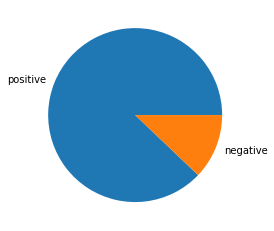

In [182]:
ccdata['polarity'] = 0.0000
for index,row in ccdata.iterrows():
    analysis = TextBlob(ccdata['Tweets'][index])
    sentiment, confidence  = analysis.sentiment
    ccdata.at[index,'polarity'] = sentiment
    
posi=0
nega=0
for i in range (0,len(ccdata)):
    get_val=ccdata['polarity'][i]
    if(float(get_val)<(0)):
        nega=nega+1
    else:
        posi=posi+1
        
posper=(posi/(len(ccdata)))*100
negper=(nega/(len(ccdata)))*100
print("% of positive tweets= ",posper)
print("% of negative tweets= ",negper)
arr=np.asarray([posper,negper], dtype=int)
mlpt.pie(arr,labels=['positive','negative'])
mlpt.plot()

In [212]:
start = datetime.datetime(2012,10,26)
## Let's get Apple stock data; Apple's ticker symbol is AAPL
## First argument is the series we want, second is the source ("yahoo" for Yahoo! Finance), third is the start date, fourth is the end date
tesla = web.DataReader('TSLA', 'yahoo', start)
tesla.to_csv('TESLA_stock_price.csv')

In [233]:
read_stock_p=pd.read_csv('TESLA_stock_price.csv')
read_stock_p.tail()

,Date,High,Low,Open,Close,Volume,Adj Close
1783,11/29/2019,331.260010,327.500000,331.109985,329.940002,2465600,329.940002
1784,12/2/2019,336.380005,328.690002,329.399994,334.869995,6074500,334.869995
1785,12/3/2019,337.910004,332.190002,332.619995,336.200012,6573700,336.200012
1786,12/4/2019,337.859985,332.850006,337.750000,333.029999,5533000,333.029999
1787,12/5/2019,334.364014,327.250000,332.829987,330.369995,3736976,330.369995


In [262]:
ccdata['Prices']=""

indx=0
for i in range (0,len(ccdata)):
    for j in range (0,len(read_stock_p)):
        get_tweet_date=ccdata.Date.iloc[i]
        get_stock_date=read_stock_p.Date.iloc[j]             
        if(str(get_stock_date)==str(get_tweet_date)):
            #print(get_stock_date," ",get_tweet_date)
            ccdata.at[i,'Prices']=int(read_stock_p.Close[j])
            break

In [263]:
ccdata.head()

,Date,Tweets,polarity,Prices
0,9/29/2017,MeltingIce Assuming max acceleration of 2 to 3...,0.156151,341
1,9/28/2017,kevinroose Just another day in the office Fas...,0.500000,339
2,9/27/2017,Prev ideas for paying 10B dev cost incl Kicks...,-0.133333,340
3,9/26/2017,ElDeano Daimler Jalopnik Yes I did Good NYT ...,0.350000,345
4,9/25/2017,Daimler Good Major improvements some unexpec...,0.287500,344


In [237]:
for i in range(1,len(ccdata)):
    if(ccdata.Prices.iloc[i]==""):
            ccdata.Prices.iloc[i]=int(ccdata.Prices.iloc[i-1])

#ccdata['Prices'] = ccdata['Prices'].apply(np.int64)


In [241]:
ccdata.head(6)

,Date,Tweets,polarity,Prices
0,9/29/2017,MeltingIce Assuming max acceleration of 2 to 3...,0.156151,341
1,9/28/2017,kevinroose Just another day in the office Fas...,0.500000,339
2,9/27/2017,Prev ideas for paying 10B dev cost incl Kicks...,-0.133333,340
3,9/26/2017,ElDeano Daimler Jalopnik Yes I did Good NYT ...,0.350000,345
4,9/25/2017,Daimler Good Major improvements some unexpec...,0.287500,344
5,9/16/2017,Richwsadler Does my hivemind count as me Bobb...,-0.125000,344


In [242]:
ccdata.dtypes

Date         object
Tweets       object
polarity    float64
Prices        int64
dtype: object

In [244]:
ccdata.shape

(549, 4)

In [243]:
ccdata.to_csv("Tesla_tweets_with_stocks_old.csv")

In [254]:
test1 = ccdata.iloc[0:100]
train1 = ccdata.iloc[100:549]

train = train1.to_numpy()
test = test1.to_numpy()

X_train= np.asarray([x[-2] for x in train])
y_train = np.array([x[-1] for x in train])

X_test= np.array([x[-2] for x in test])
y_test = np.array([x[-1] for x in test])
#y= np.array(ccdata['Prices'].values).astype(float)
#(X_train,X_test,y_train,y_test) = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
rf = RandomForestRegressor()

rf.fit(X_train.reshape(-1,1), y_train)
prediction, bias, contributions = ti.predict(rf, X_test.reshape(-1,1))
rf.predict(X_test.reshape(-1,1))
rf.score(X_train.reshape(-1,1),y_train)

In [ ]:
date_test = np.array([x[0] for x in test])
plt.plot(date_test,y_test, label="actual Prices")
plt.plot(date_test,prediction, label="Predicted Prices")
plt.xlabel('Date') 
plt.ylabel('Price')
plt.title('My Experiment')
plt.legend()
plt.show()

In [116]:
train_data_start = '01/01/2012'
train_data_end = '12/31/2016'
test_data_start = '01/01/2017'
test_data_end = '12/31/2017'
train = ccdata.ix[train_data_start : train_data_end]
test = ccdata.ix[test_data_start:test_data_end]

C:\Users\Kamakshi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """
C:\Users\Kamakshi\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [117]:
list_of_sentiments_score = []
for date, row in train.T.iteritems():
    sentiment_score = np.asarray([ccdata.loc[date, 'polarity']])
    list_of_sentiments_score.append(sentiment_score)
numpy_dataframe_train = np.asarray(list_of_sentiments_score)

In [122]:
list_of_sentiments_score = []
for date, row in test.T.iteritems():
    sentiment_score = np.asarray([ccdata.loc[date, 'polarity']])
    list_of_sentiments_score.append(sentiment_score)
numpy_dataframe_test = np.asarray(list_of_sentiments_score)

In [120]:
y_train = pd.DataFrame(train['Prices'])
y_test = pd.DataFrame(test['Prices'])

In [130]:
rf = RandomForestRegressor()
rf.fit(numpy_dataframe_train, train['Prices'])
prediction=rf.predict(numpy_dataframe_test)
%matplotlib inline
print(rf.score(numpy_dataframe_test, test['Prices']))
idx = pd.date_range(test_data_start, test_data_end)


1.0


C:\Users\Kamakshi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [131]:
idx
predictions_df = pd.DataFrame(data=prediction[0:], index = idx, columns=['Prices'])
predictions_df.columns = ['predicted_price', 'actual_price']
predictions_df.plot()


print(rf.score(numpy_dataframe_train, train['Prices']))

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08',
               '2017-01-09', '2017-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', length=365, freq='D')